# Logistic Regression

Logistic regression estimates the probability of an event occurring, such as vaccinated or didn't vaccinated, based on a given dataset of independent variables.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ("ignore")

In [2]:
data =pd.read_csv("h1n1_vaccine_prediction.csv")
data

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [3]:
data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [4]:
data.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

## Replacing the null Values 

In [5]:
null_obj=[]
for i in data:
    if(data[i].dtype == "object" and data[i].isna().sum()>0):
        null_obj.append(i)

In [6]:
null_obj

['qualification',
 'income_level',
 'marital_status',
 'housing_status',
 'employment']

In [7]:
for i in null_obj:
    data[i].fillna(data[i].mode()[0],inplace=True)

In [8]:
data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                    0
race                             0
sex                              0
income_level                     0
marital_status                   0
housing_status      

In [9]:
null_object=[]
for i in data:
    if(data[i].dtypes=="float" and data[i].isna().sum()>0):
        null_object.append(i)

In [10]:
null_object

['h1n1_worry',
 'h1n1_awareness',
 'antiviral_medication',
 'contact_avoidance',
 'bought_face_mask',
 'wash_hands_frequently',
 'avoid_large_gatherings',
 'reduced_outside_home_cont',
 'avoid_touch_face',
 'dr_recc_h1n1_vacc',
 'dr_recc_seasonal_vacc',
 'chronic_medic_condition',
 'cont_child_undr_6_mnths',
 'is_health_worker',
 'has_health_insur',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'sick_from_seas_vacc',
 'no_of_adults',
 'no_of_children']

In [11]:
for i in null_object:
    data[i].fillna(data[i].mean(),inplace=True)

In [12]:
data.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

# Exploratory Data Analysis

([<matplotlib.patches.Wedge at 0x1d372a122d0>,
 [Text(-0.8639477490730085, 0.680877585819714, 'Not vaccinated'),
  Text(0.8639477490730082, -0.6808775858197146, 'vaccinated')],
 [Text(-0.4712442267670955, 0.37138777408348034, '78.8%'),
  Text(0.4712442267670953, -0.3713877740834806, '21.2%')])

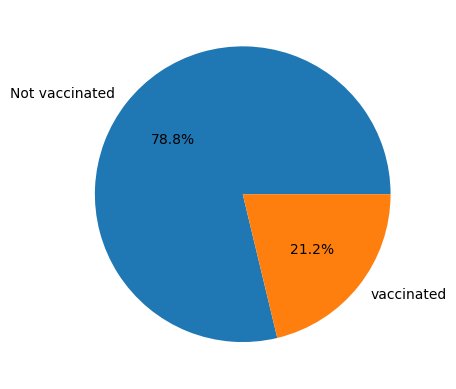

In [13]:
sizes=data["h1n1_vaccine"].value_counts().values
label=["Not vaccinated","vaccinated"]
explode=[0,.1]
plt.pie(sizes,labels=label,autopct='%1.1f%%')

78.8% people have not done their vaccination and 21.2% have done their vaccination.

<Axes: xlabel='census_msa', ylabel='count'>

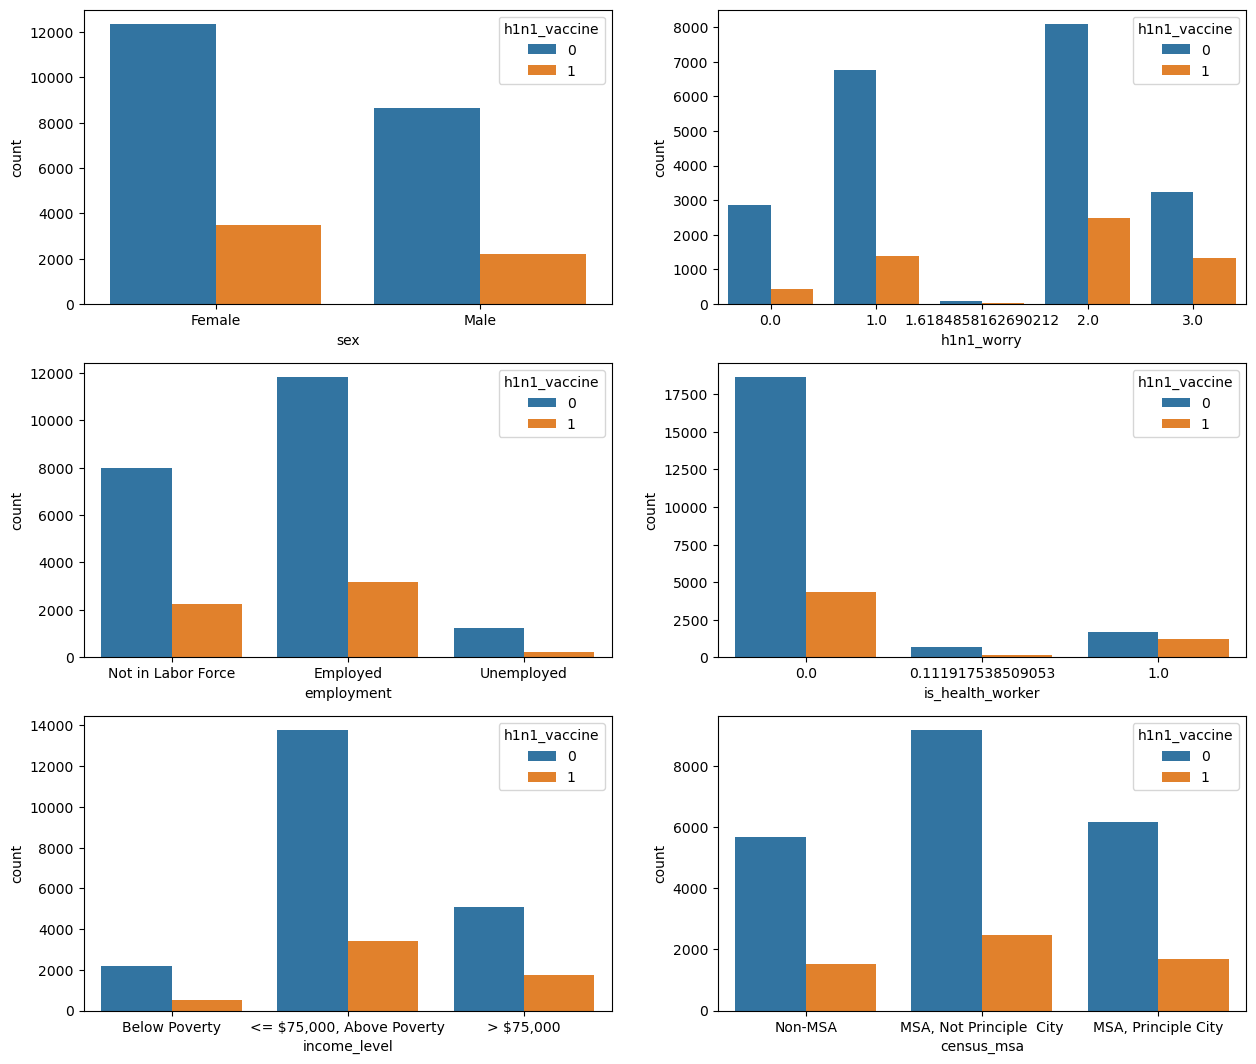

In [14]:
fig,ax=plt.subplots(3,2,figsize=(15,13))
sns.countplot(x="sex",hue="h1n1_vaccine",data=data,ax=ax[0][0])
sns.countplot(x="h1n1_worry",hue="h1n1_vaccine",data=data,ax=ax[0][1])
sns.countplot(x="employment",hue="h1n1_vaccine",data=data,ax=ax[1][0])
sns.countplot(x="is_health_worker",hue="h1n1_vaccine",data=data,ax=ax[1][1])
sns.countplot(x="income_level",hue="h1n1_vaccine",data=data,ax=ax[2][0])
sns.countplot(x="census_msa",hue="h1n1_vaccine",data=data,ax=ax[2][1])

### Insights

Majority of females has not done with the vaccination.

More number of employed people had not took the vaccination.

Many of the people are worried about the flu but still had not done with the vaccination.

In [15]:
#converting categorical data to numeric data (Label Encoding)

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=data.select_dtypes(include=np.object_)

In [17]:
cols

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


In [18]:
for i in cols:
    data[i]=le.fit_transform(data[i])

In [19]:
data

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,...,3,0,2,1,0,1,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,...,3,1,2,1,1,0,0,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,3,1,0,1,0,0,0,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,...,3,0,2,1,1,1,1,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.000000,...,3,0,0,0,0,0,0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,...,3,0,0,1,0,1,2,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,...,3,1,0,1,1,0,1,1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,...,3,0,0,1,0,0,0,0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.677264,...,1,0,0,0,1,0,2,1.0,0.0,0


# Feature Selection using Chi Square

In [20]:
from sklearn.feature_selection import SelectKBest, chi2

In [21]:
x1=data.drop("h1n1_vaccine" ,axis=1)
y1=data["h1n1_vaccine"]

In [22]:
score=chi2(x1,y1)
score

(array([1.27892347e+03, 2.01974270e+02, 1.11511825e+02, 4.15917124e+01,
        1.64316392e+01, 1.23368060e+02, 2.59216425e+01, 5.40811981e+00,
        8.34073550e+00, 4.38753774e+01, 2.83189338e+03, 6.91076127e+02,
        1.61644925e+02, 1.03590619e+02, 6.45327072e+02, 1.71964784e+01,
        4.96280005e+02, 1.91112896e+03, 1.15176420e+02, 2.43255983e+02,
        1.21282360e+03, 1.50638090e+00, 4.37694949e+01, 2.01459556e+01,
        1.49313640e+01, 6.77656778e+00, 1.28867110e+01, 3.05614312e+01,
        1.99380265e+01, 2.49155964e+00, 3.83927863e-03, 9.57151704e-01,
        4.66319688e-01]),
 array([4.30008095e-280, 7.74483827e-046, 4.57070817e-026, 1.12469033e-010,
        5.04363233e-005, 1.15838585e-028, 3.55560337e-007, 2.00432929e-002,
        3.87659010e-003, 3.49963941e-011, 0.00000000e+000, 2.60781489e-152,
        4.94610216e-037, 2.48752236e-024, 2.31945804e-142, 3.37060602e-005,
        6.12875152e-110, 0.00000000e+000, 7.19986456e-027, 7.66964607e-055,
        9.96291574

In [23]:
p_value=pd.Series(score[1],index=x1.columns)

In [24]:
irr_Col=[]
for i in p_value.index:
    if p_value[i]<=0.05:
        print(i,": Rejected")
    else:
        print(i,": Accepted")
        irr_Col.append(i)


unique_id : Rejected
h1n1_worry : Rejected
h1n1_awareness : Rejected
antiviral_medication : Rejected
contact_avoidance : Rejected
bought_face_mask : Rejected
wash_hands_frequently : Rejected
avoid_large_gatherings : Rejected
reduced_outside_home_cont : Rejected
avoid_touch_face : Rejected
dr_recc_h1n1_vacc : Rejected
dr_recc_seasonal_vacc : Rejected
chronic_medic_condition : Rejected
cont_child_undr_6_mnths : Rejected
is_health_worker : Rejected
has_health_insur : Rejected
is_h1n1_vacc_effective : Rejected
is_h1n1_risky : Rejected
sick_from_h1n1_vacc : Rejected
is_seas_vacc_effective : Rejected
is_seas_risky : Rejected
sick_from_seas_vacc : Accepted
age_bracket : Rejected
qualification : Rejected
race : Rejected
sex : Rejected
income_level : Rejected
marital_status : Rejected
housing_status : Rejected
employment : Accepted
census_msa : Accepted
no_of_adults : Accepted
no_of_children : Accepted


In [25]:
irr_Col

['sick_from_seas_vacc',
 'employment',
 'census_msa',
 'no_of_adults',
 'no_of_children']

In [26]:
 data.drop(irr_Col,axis=1,inplace=True)

In [27]:
data

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,is_seas_vacc_effective,is_seas_risky,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,...,2.0,1.0,3,1,3,0,2,1,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,...,4.0,2.0,1,0,3,1,2,1,1,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,4.0,1.0,0,2,3,1,0,1,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,...,5.0,4.0,4,0,3,0,2,1,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.000000,...,3.0,1.0,2,3,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,...,5.0,2.0,4,3,3,0,0,1,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,...,5.0,1.0,0,2,3,1,0,1,1,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,...,5.0,4.0,3,3,3,0,0,1,0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.677264,...,2.0,1.0,0,3,1,0,0,0,1,0


In [28]:
data.corr()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,is_seas_vacc_effective,is_seas_risky,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,h1n1_vaccine
unique_id,1.000000,0.017804,0.003418,-0.008463,0.009602,-0.006641,0.011097,0.004532,0.008995,0.007555,...,0.005884,-0.005240,0.010692,-0.000355,-0.002298,0.005169,-0.004365,-0.003021,-0.007372,-0.003280
h1n1_worry,0.017804,1.000000,0.062081,0.089985,0.231965,0.155466,0.292480,0.254137,0.245597,0.246809,...,0.231974,0.329235,0.059493,-0.047514,-0.129973,-0.127402,0.046999,-0.028324,0.000503,0.121747
h1n1_awareness,0.003418,0.062081,1.000000,-0.010802,0.088151,0.029953,0.089376,-0.048697,-0.067895,0.085646,...,0.084634,0.075499,-0.044026,0.168245,0.150409,-0.067175,-0.017890,-0.108665,-0.108308,0.117714
antiviral_medication,-0.008463,0.089985,-0.010802,1.000000,0.049075,0.145896,0.063983,0.106089,0.127339,0.070740,...,0.014764,0.083740,-0.093948,-0.027966,-0.111058,-0.006177,0.061078,0.006040,0.056706,0.040518
contact_avoidance,0.009602,0.231965,0.088151,0.049075,1.000000,0.064766,0.336248,0.226534,0.219346,0.332878,...,0.117861,0.127525,0.000895,0.014647,0.001793,-0.113486,0.017241,-0.045365,-0.028998,0.047538
bought_face_mask,-0.006641,0.155466,0.029953,0.145896,0.064766,1.000000,0.083283,0.180567,0.163090,0.104170,...,0.040916,0.108311,0.005259,-0.015583,-0.083153,-0.049970,0.038394,0.001636,0.043488,0.070464
wash_hands_frequently,0.011097,0.292480,0.089376,0.063983,0.336248,0.083283,1.000000,0.194898,0.192227,0.363796,...,0.137041,0.170530,0.016874,-0.018747,-0.065367,-0.157128,0.023683,-0.041286,-0.017540,0.074663
avoid_large_gatherings,0.004532,0.254137,-0.048697,0.106089,0.226534,0.180567,0.194898,1.000000,0.582328,0.252813,...,0.077671,0.131358,0.094517,-0.089330,-0.108920,-0.056055,0.015319,0.025880,0.047567,0.017798
reduced_outside_home_cont,0.008995,0.245597,-0.067895,0.127339,0.219346,0.163090,0.192227,0.582328,1.000000,0.266868,...,0.066708,0.118829,0.090197,-0.107289,-0.125079,-0.039365,0.034073,0.025156,0.063323,0.021742
avoid_touch_face,0.007555,0.246809,0.085646,0.070740,0.332878,0.104170,0.363796,0.252813,0.266868,1.000000,...,0.104603,0.141977,0.051725,-0.029341,-0.056389,-0.162931,0.003781,-0.028371,-0.018044,0.071518


In [29]:
# drop the values having negative impact
data.drop(["marital_status","housing_status","sex","unique_id","income_level","avoid_large_gatherings","reduced_outside_home_cont","cont_child_undr_6_mnths"],axis=1,inplace=True)

In [30]:
data

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,age_bracket,qualification,race,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,...,1.00000,3.0,1.0,2.0,2.0,1.0,3,1,3,0
1,3.0,2.0,0.0,1.0,0.0,1.0,1.000000,0.000000,0.000000,0.0,...,1.00000,5.0,4.0,4.0,4.0,2.0,1,0,3,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.220312,0.329735,1.0,...,0.87972,3.0,1.0,1.0,4.0,1.0,0,2,3,0
3,1.0,1.0,0.0,1.0,0.0,1.0,0.000000,0.000000,1.000000,1.0,...,0.87972,3.0,3.0,5.0,5.0,4.0,4,0,3,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.000000,0.000000,0.000000,0.0,...,0.87972,3.0,3.0,2.0,3.0,1.0,2,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.87972,3.0,1.0,1.0,5.0,2.0,4,3,3,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.000000,1.000000,1.000000,0.0,...,1.00000,4.0,2.0,2.0,5.0,1.0,0,2,3,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.000000,0.000000,0.000000,0.0,...,0.87972,4.0,4.0,2.0,5.0,4.0,3,3,3,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.677264,0.000000,0.000000,0.0,...,0.00000,3.0,1.0,2.0,2.0,1.0,0,3,1,0


# Test and train the data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x=data.drop("h1n1_vaccine",axis=1)
y=data["h1n1_vaccine"]

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=97)

In [34]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17359, 20), (9348, 20), (17359,), (9348,))

# Model Building and Evaluation

In [35]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)

LogisticRegression()

In [36]:
#Making Predictions

In [37]:
y_pred=log_reg.predict(x_test)

In [38]:
# Model Evaluation
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("roc_auc_score:",roc_auc_score(y_test, y_pred))
print("F1 Score: ",f1_score(y_test, y_pred))

Accuracy: 0.8339751818570817
roc_auc_score: 0.6841075651686892
F1 Score:  0.5233415233415233


# Balancing the data Using SMOTE

In [39]:
#blancing the data using SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=23)
x_sm,y_sm=sm.fit_resample(x,y)

In [40]:
y.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [41]:
y_sm.value_counts()

0    21033
1    21033
Name: h1n1_vaccine, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm, test_size=0.25,random_state=97)

In [43]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [44]:
pred = model.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, f1_score

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, f1_score
print("Accuracy score:",accuracy_score(y_test,pred))
print("f1-score", f1_score(y_test,pred))
print("auc score: ", roc_auc_score(y_test,pred))

Accuracy score: 0.767804506988685
f1-score 0.7633720930232558
auc score:  0.7677957751490896
